In [ ]:
!pip install torch
!pip install torchvision
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Import Library

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import math
import time
import os
import glob
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torchsummary import summary
import torchvision
import torchvision.datasets as datasets
import torchvision.models as models
import torchvision.transforms as transforms
import itertools
from sklearn.metrics import confusion_matrix
import cv2
from google.colab.patches import cv2_imshow
from sklearn.model_selection import cross_val_score
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import scikitplot as skplt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from functools import partial
import random
from concurrent import futures
from sklearn.metrics.pairwise import euclidean_distances
import tensorflow as tf
from matplotlib import pyplot
from pylab import *
from keras.preprocessing.image import ImageDataGenerator
from numpy import save
from numpy import load
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, precision_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from scipy.stats import norm
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
np.set_printoptions(precision=2)
use_gpu = torch.cuda.is_available()
np.random.seed(1234)

#Connect Google Drive

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

#!ls 'drive/My Drive'

Mounted at /content/drive


##Data Preprocessing : Remove Hair

(224, 224, 3)


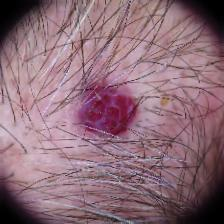

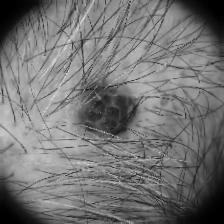

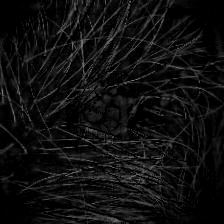

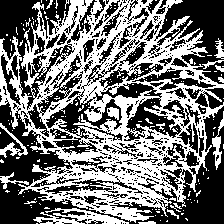

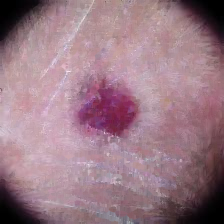

In [ ]:
#Remove Hair
src = cv2.imread("/content/drive/MyDrive/ProjectMl/dataset/Benign/_0_2682.jpg")
#src = cv2.resize(src, None, fx=224, fy=224, interpolation=cv2.INTER_LINEAR)
print( src.shape )
cv2_imshow(src )
src= np.array(src,dtype='uint8')

# Convert the original image to grayscale
grayScale = cv2.cvtColor( src, cv2.COLOR_RGB2GRAY )
cv2_imshow(grayScale)
#cv2.imwrite('grayScale_sample1.jpg', grayScale, [int(cv2.IMWRITE_JPEG_QUALITY), 90])
grayScale= np.array(grayScale,dtype='uint8')
# Kernel for the morphological filtering
kernel = cv2.getStructuringElement(1,(17,17))

# Perform the blackHat filtering on the grayscale image to find the
# hair countours
blackhat = cv2.morphologyEx(grayScale, cv2.MORPH_BLACKHAT, kernel)
cv2_imshow(blackhat)
#cv2.imwrite('blackhat_sample1.jpg', blackhat, [int(cv2.IMWRITE_JPEG_QUALITY), 90])
blackhat= np.array(blackhat,dtype='uint8')
# intensify the hair countours in preparation for the inpainting
# algorithm
ret,thresh2 = cv2.threshold(blackhat,10,255,cv2.THRESH_BINARY)
#print( thresh2.shape )
cv2_imshow(thresh2)
#cv2.imwrite('thresholded_sample1.jpg', thresh2, [int(cv2.IMWRITE_JPEG_QUALITY), 90])
thresh2= np.array(thresh2,dtype='uint8')
# inpaint the original image depending on the mask
dst = cv2.inpaint(src,thresh2,1,cv2.INPAINT_TELEA)
cv2_imshow(dst)
dst= np.array(dst,dtype='uint8')
#cv2.imwrite('/content/drive/My Drive/ISIC_0031527_1.jpg', dst, [int(cv2.IMWRITE_JPEG_QUALITY), 90])
